In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks, peak_widths
from scipy.signal import argrelextrema, argrelmax, argrelmin
import dask.dataframe


col='vhee'
energy='100 MV'
hist="5m"
CSD=5.0
x=np.arange(-2.495,2.495+0.01,0.01)



data03=pd.read_csv("D:Desktop/SFRT-Topas/vhee/phsp_test/phsp_test_100MV_old.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])



data03.dose=(data03.dose*4.5)/(1.60218*10**-19)/5e6; #4.5 amps




In [24]:
dose03_1=np.zeros((500,500));dose03_2=np.zeros((500,500));dose03_3=np.zeros((500,500));dose03_4=np.zeros((500,500))
dose03_5=np.zeros((500,500));dose03_6=np.zeros((500,500));dose03_7=np.zeros((500,500));dose03_8=np.zeros((500,500))
dose03_9=np.zeros((500,500));dose03_10=np.zeros((500,500));dose03_11=np.zeros((500,500));dose03_12=np.zeros((500,500))
dose03_13=np.zeros((500,500));dose03_14=np.zeros((500,500));dose03_15=np.zeros((500,500));dose03_16=np.zeros((500,500))
dose03_17=np.zeros((500,500));dose03_18=np.zeros((500,500));dose03_19=np.zeros((500,500));dose03_20=np.zeros((500,500))


print(len(data03.dose))
for i in np.arange(0,len(data03.dose),20):
    dose03_1[data03.x[i]][data03.y[i]]=data03.dose[i]
    dose03_2[data03.x[i+1]][data03.y[i+1]]=data03.dose[i+1]
    dose03_3[data03.x[i+2]][data03.y[i+2]]=data03.dose[i+2]
    dose03_4[data03.x[i+3]][data03.y[i+3]]=data03.dose[i+3]
    dose03_5[data03.x[i+4]][data03.y[i+4]]=data03.dose[i+4]
    dose03_6[data03.x[i+5]][data03.y[i+5]]=data03.dose[i+5]
    dose03_7[data03.x[i+6]][data03.y[i+6]]=data03.dose[i+6]
    dose03_8[data03.x[i+7]][data03.y[i+7]]=data03.dose[i+7]
    dose03_9[data03.x[i+8]][data03.y[i+8]]=data03.dose[i+8]
    dose03_10[data03.x[i+9]][data03.y[i+9]]=data03.dose[i+9]
    dose03_11[data03.x[i+10]][data03.y[i+10]]=data03.dose[i+10]
    dose03_12[data03.x[i+11]][data03.y[i+11]]=data03.dose[i+11]
    dose03_13[data03.x[i+12]][data03.y[i+12]]=data03.dose[i+12]
    dose03_14[data03.x[i+13]][data03.y[i+13]]=data03.dose[i+13]
    dose03_15[data03.x[i+14]][data03.y[i+14]]=data03.dose[i+14]
    dose03_16[data03.x[i+15]][data03.y[i+15]]=data03.dose[i+15]
    dose03_17[data03.x[i+16]][data03.y[i+16]]=data03.dose[i+16]
    dose03_18[data03.x[i+17]][data03.y[i+17]]=data03.dose[i+17]
    dose03_19[data03.x[i+18]][data03.y[i+18]]=data03.dose[i+18]
    dose03_20[data03.x[i+19]][data03.y[i+19]]=data03.dose[i+19]



5000000


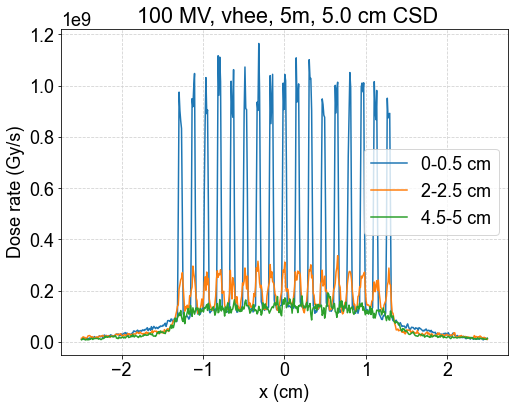

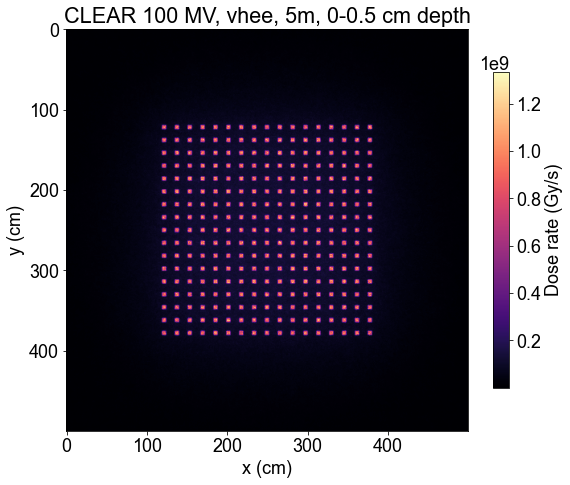

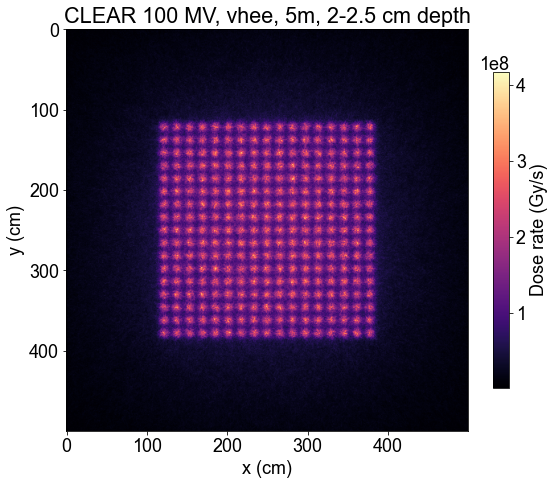

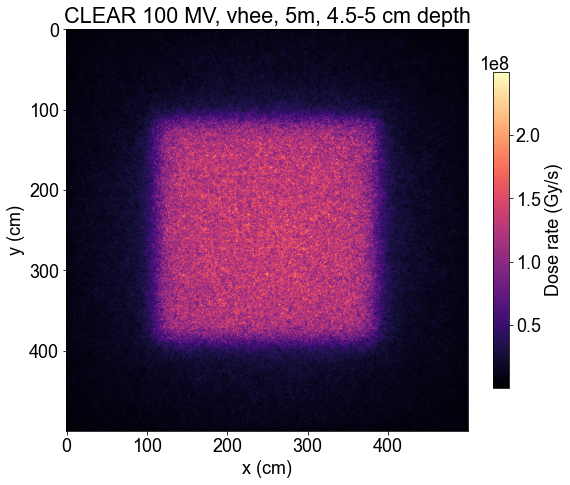

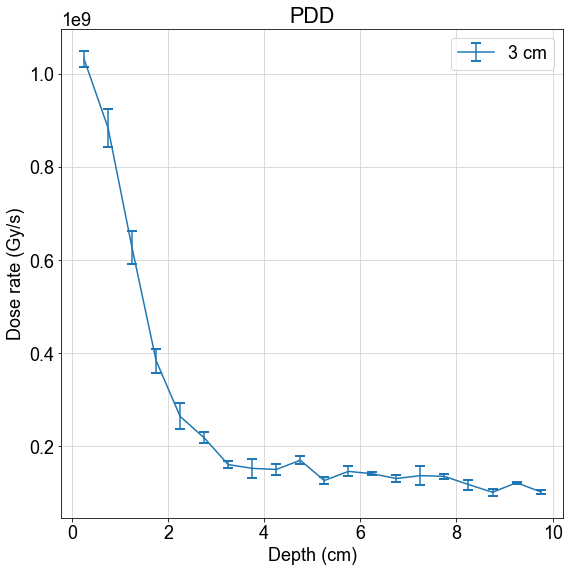

In [25]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

doses03=[dose03_1,dose03_2,dose03_3,dose03_4,dose03_5,dose03_6,dose03_7,dose03_8,dose03_9,dose03_10,dose03_11,dose03_12,dose03_13,dose03_14,dose03_15,dose03_16,dose03_17,dose03_18,dose03_19,dose03_20]

profile03_1=(dose03_1.T[250]+dose03_1.T[251])/2
profile03_2=(dose03_5.T[250]+dose03_5.T[251])/2
profile03_3=(dose03_10.T[250]+dose03_10.T[251])/2




figure(1,figsize=(8,6))
plt.title(' '+str(energy)+', '+col+', '+str(hist)+', '+str(CSD)+' cm CSD')
plt.plot(x,profile03_1,label='0-0.5 cm')
#plt.plot(x,profile05_1,label='5 cm')
plt.plot(x,profile03_2,label='2-2.5 cm')
#plt.plot(x,profile09_1,label='9 cm')
plt.plot(x,profile03_3,label='4.5-5 cm')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('Dose rate (Gy/s)')
plt.grid(c='lightgray',ls='--')
#plt.xlim(-0.5,0.5)





figure(4,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-0.5 cm depth')
plt.imshow(dose03_1,cmap='magma')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(5,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 2-2.5 cm depth')
plt.imshow(dose03_5,cmap='magma')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(6,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 4.5-5 cm depth')
plt.imshow(dose03_10,cmap='magma')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

depths=np.arange(0.25,10,0.5)
PDD03=[];
PDD03_err=[];
for d in np.arange(0,len(doses03)):
    arr03=[]
    arr03=[doses03[d][250][250],doses03[d][251][250],doses03[d][250][251],doses03[d][251][251]]
    PDD03.append(np.mean(arr03))
    PDD03_err.append(np.std(arr03)/2)
    
figure(7,figsize=(9,9))
plt.title('PDD')
plt.errorbar(depths,PDD03,yerr=PDD03_err,capsize=5,capthick=2,label='3 cm')
plt.ylabel('Dose rate (Gy/s)')
plt.xlabel('Depth (cm)')
plt.legend()
plt.grid(c='lightgray')

PDD250MV=[PDD03,PDD03_err]

# np.save('D:Desktop/SFRT-Topas/vhee/vhee_bestopt/results/PDD250MV.npy',PDD250MV)

In [ ]:
def align_y_axis(ax1, ax2, minresax1, minresax2,numticks):
    """ Sets tick marks of twinx axes to line up with x total tick marks

    ax1 and ax2 are matplotlib axes
    Spacing between tick marks will be a factor of minresax1 and minresax2"""

    ax1ylims = ax1.get_ybound()
    ax2ylims = ax2.get_ybound()
    ax1factor = minresax1 * (numticks-1)
    ax2factor = minresax2 * (numticks-1)
    ax1.set_yticks(np.linspace(ax1ylims[0],
                               ax1ylims[1]+(ax1factor -
                               (ax1ylims[1]-ax1ylims[0]) % ax1factor) %
                               ax1factor,
                               numticks))
    ax2.set_yticks(np.linspace(ax2ylims[0],
                               ax2ylims[1]+(ax2factor -
                               (ax2ylims[1]-ax2ylims[0]) % ax2factor) %
                               ax2factor,
                               numticks))

In [ ]:
#peaks
mean_peaks=[]
ROI=[]
peak_error=[]
valley_error=[]
for d in np.arange(0,len(doses03)):
    if d==0:
        col_avgs=sum(doses03[d][50:150])
        row_avgs=sum(doses03[d].T[50:150])
        peak_rows=find_peaks(row_avgs,distance=13)[0]
        peak_cols=find_peaks(col_avgs,distance=13)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]

        peak_peaks=[[i,j] for i in peak_rows for j in peak_cols]
    
    for k,w in peak_peaks:
        ROI.append([[k,w],[k,w+1],[k+1,w],[k-1,w],[k,w-1],[k-1,w-1],[k+1,w+1],[k-1,w+1],[k+1,w-1]])
    #print(ROI,np.shape(ROI))
    peaks=[doses03[d][j][i] for i,j in np.reshape(ROI,(225,2))] 
    mean_peaks.append(np.mean(peaks))
    figure(13+d,figsize=(9,8))
    plt.imshow(doses03[d],cmap='magma')
    plt.colorbar(shrink=0.75)
    for i,j in np.reshape(ROI,(225,2)):
        plt.scatter(j,i,marker='s',c='red',s=1)
    STD=[]
    ROI_dose=[]
    for i in ROI:
        temp=[]
        for k in i:
            temp.append(doses03[d][k[0]][k[1]])
        ROI_dose.append(temp)
    for i in ROI_dose:
        STD.append(np.std(i))
    peak_error.append(np.sqrt(sum([i**2 for i in STD]))/25) 
    ROI=[]
mean_peaks=np.array(mean_peaks)


    
#valleys
mean_valleys=[]
for d in np.arange(0,len(doses03)):
    if d==0:
        col_avgs=sum(doses03[d][50:175])
        row_avgs=sum(doses03[d].T[50:175])

        peak_rows=find_peaks(row_avgs,distance=13)[0] #need for limiting valley area search
        peak_cols=find_peaks(col_avgs,distance=13)[0]
        peak_cols=peak_cols[int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])-2:int(np.where((peak_cols>=97) & ( peak_cols <=103))[0])+3]
        peak_rows=peak_rows[int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])-2:int(np.where((peak_rows>=97) & ( peak_rows <=103))[0])+3]
        if d==0:
            valley_rows=find_peaks(row_avgs[peak_rows[0]:peak_rows[-1]+1]*-1,distance=6)[0]+peak_rows[0]
        else:
            valley_rows=find_peaks(row_avgs[peak_rows[0]:peak_rows[-1]]*-1,distance=6)[0]+peak_rows[0]
        valley_cols=find_peaks(col_avgs[peak_cols[0]:peak_cols[-1]]*-1,distance=6)[0]+peak_cols[0]

    vert_valleys=[]
    hori_valleys=[]
    for i in valley_cols:
        vert_valleys.append(np.mean(doses03[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for i in valley_rows:
        hori_valleys.append(np.mean(doses03[d][i][peak_rows[0]:peak_rows[-1]]))
        
    figure(13+d,figsize=(9,8))
    plt.hlines(valley_rows,peak_cols[0],peak_cols[-1],colors='red')
    plt.vlines(valley_cols,peak_rows[0],peak_rows[-1],colors='red')

    mean_valleys.append((np.mean(hori_valleys)+np.mean(vert_valleys))/2)
    STDS=[]
    for i in valley_cols:
        STDS.append(np.std(doses03[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for j in valley_rows:
        STDS.append(np.std(doses03[d][j][peak_cols[0]:peak_cols[-1]]))
    valley_error.append(np.sqrt(sum([i**2 for i in STDS]))/8)
pvdr=mean_peaks/mean_valleys
valley_error=np.array(valley_error);peak_error=np.array(peak_error)
pvdr_error=np.sqrt((valley_error/mean_valleys)**2+(peak_error/mean_peaks)**2)*pvdr

figure(23,figsize=(8,8))
fig, ax1=plt.subplots(figsize=(8,8))
plt.errorbar(depths,mean_peaks,yerr=peak_error,marker='o',markersize=9,capsize=5,capthick=2,label='Mean peak dose (Gy)',c='darkorange')
plt.ylabel('Mean peak dose (Gy)',c='tab:orange')
plt.xlabel('Depth (cm)')
plt.grid(c='lightgray',axis='both',ls='--')
plt.ylim(bottom=0)
ax2=ax1.twinx()
plt.errorbar(depths,pvdr,yerr=pvdr_error,marker='o',markersize=9,capsize=5,capthick=2,label='PVDR')
plt.ylabel('PVDR',c='tab:blue')
plt.grid(c='lightgray',axis='both',ls='--')
plt.ylim(bottom=0)
fig.legend(loc="upper center", bbox_to_anchor=(0.5,0.8455))
plt.title('Optimized collimator')

align_y_axis(ax1,ax2,0.1*10**10,5,6)


In [ ]:
pvdr100MV=[pvdr,pvdr_error]
peak100MV=[mean_peaks,peak_error]

# np.save('D:Desktop/SFRT-Topas/vhee/vhee_bestopt/results/pvdr100MV.npy',pvdr100MV)
# np.save('D:Desktop/SFRT-Topas/vhee/vhee_bestopt/results/peak100MV.npy',peak100MV)

In [ ]:

s:Sc/TestBoxDoseToMedium/OutputFile = "./dosetomedium_testbox"
i:Ts/Seed =85511

i:Sc/TestBoxDoseToMedium/XBins = 200
i:Sc/TestBoxDoseToMedium/YBins = 200
i:Sc/TestBoxDoseToMedium/ZBins = 20

sv:Sc/TestBoxDoseToMedium/Report = 1 "Sum" # One or more of Sum, Mean, Histories, Count_In_Bin, Second_Moment, Variance, Standard_Deviation, Min, Max
s:Sc/TestBoxDoseToMedium/Quantity                         = "DoseToMedium"
s:Sc/TestBoxDoseToMedium/Component                        = "TestBox"
b:Sc/TestBoxDoseToMedium/OutputToConsole                  = "TRUE"
s:Sc/TestBoxDoseToMedium/IfOutputFileAlreadyExists        = "Overwrite"